In [1]:
import pandas as pd

ddos = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
ddos.head()
column_names = ddos.columns

In [2]:
pd.options.mode.use_inf_as_na = True
nan_list = ddos.isnull().sum().tolist()

In [3]:
nan_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 34,
 34,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [6]:
ddos.dropna(inplace=True)

In [7]:
X = ddos.iloc[:, :-1]
Y = ddos.iloc[:, -1]

In [8]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rm = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
rm.fit(X, Y.values.ravel())

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [9]:
importances = rm.feature_importances_
indices = np.argsort(importances)[::-1]

In [10]:
importances

array([3.45416843e-02, 1.80981444e-03, 3.24850148e-02, 1.05294158e-02,
       5.54576508e-02, 8.00527095e-03, 9.59779747e-02, 2.85919695e-03,
       8.46338881e-02, 2.03885309e-02, 8.95449030e-03, 2.28446935e-02,
       1.11593082e-02, 1.11899766e-02, 1.38212387e-03, 1.35937739e-03,
       1.10416152e-03, 6.15849416e-03, 1.60582977e-03, 7.56777644e-04,
       3.67016757e-02, 1.92540979e-02, 4.18253786e-02, 3.26221690e-02,
       3.96387969e-03, 6.14997562e-03, 4.50109839e-03, 3.48531935e-03,
       5.65576411e-03, 6.08912952e-04, 2.82360684e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.93696185e-02, 1.29248206e-02,
       1.78489339e-03, 5.84672716e-03, 2.43963746e-03, 3.28163551e-03,
       6.94549532e-03, 4.20447508e-03, 3.72294671e-03, 1.26177364e-04,
       2.64564524e-05, 2.46208680e-08, 3.88466212e-04, 3.17468891e-04,
       3.80458202e-03, 0.00000000e+00, 4.29261907e-08, 2.07607332e-03,
       1.13562134e-02, 8.20582871e-02, 1.12799606e-02, 2.74645674e-02,
      

In [11]:
indices

array([ 6,  8, 53,  4, 63, 68, 66, 22, 20,  0, 23,  2, 62, 34, 55, 11,  9,
       21, 35, 67, 52, 54, 13, 12,  3, 64, 65, 10,  5, 40, 17, 25, 37, 28,
       26, 41, 24, 48, 42, 27, 39,  7, 38, 69, 51,  1, 36, 18, 14, 15, 16,
       19, 29, 46, 47, 72, 73, 70, 43, 76, 71, 77, 74, 30, 44, 75, 50, 45,
       33, 57, 58, 59, 60, 61, 49, 31, 32, 56])

In [12]:
imp_result = np.argsort(importances)[::-1][:]

In [13]:
imp_result

array([ 6,  8, 53,  4, 63, 68, 66, 22, 20,  0, 23,  2, 62, 34, 55, 11,  9,
       21, 35, 67, 52, 54, 13, 12,  3, 64, 65, 10,  5, 40, 17, 25, 37, 28,
       26, 41, 24, 48, 42, 27, 39,  7, 38, 69, 51,  1, 36, 18, 14, 15, 16,
       19, 29, 46, 47, 72, 73, 70, 43, 76, 71, 77, 74, 30, 44, 75, 50, 45,
       33, 57, 58, 59, 60, 61, 49, 31, 32, 56])

In [14]:
for i in range(5):
    yaxi = X.columns[imp_result[1:5]]
    xaxi = importances[imp_result[1:5]]

In [15]:
importances[imp_result[1:5]]

array([0.08463389, 0.08205829, 0.05545765, 0.05419544])

<BarContainer object of 7 artists>

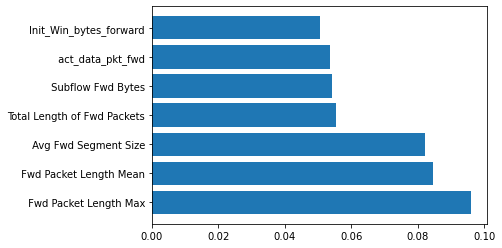

In [16]:
from matplotlib import pyplot as plt

plt.barh(X.columns[imp_result[0:7]], importances[imp_result[0:7]])